In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

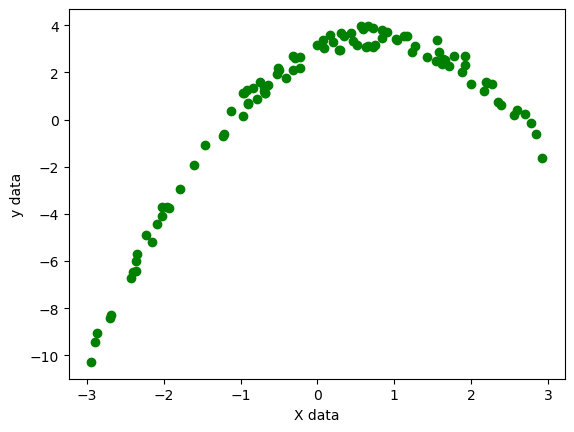

In [3]:
x= 6 * np.random.rand(100,1)-3
y=0.5-x**2 + 1.5*x + 2 + np.random.rand(100,1)

plt.scatter(x, y, color='g')
plt.xlabel("X data")
plt.ylabel("y data")
plt.show() 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
# Let's implement linear Regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [7]:
regression_1.fit(x_train,y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score
sscore = r2_score(y_test, regression_1.predict(x_test))
print(sscore)

0.31550242845762533


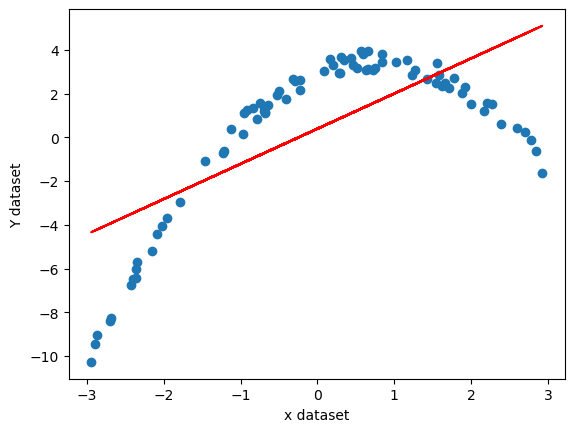

In [9]:
# Lets visualize the model
plt.plot(x_train, regression_1.predict(x_train), color='r')
plt.scatter(x_train, y_train)
plt.xlabel("x dataset")
plt.ylabel("Y dataset")
plt.show()

In [11]:
# Lets implement the polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [14]:
x_train_poly

array([[ 1.00000000e+00,  2.16223350e+00,  4.67525372e+00],
       [ 1.00000000e+00, -2.94453688e+00,  8.67029746e+00],
       [ 1.00000000e+00,  1.23480878e+00,  1.52475272e+00],
       [ 1.00000000e+00, -6.96905499e-01,  4.85677274e-01],
       [ 1.00000000e+00, -2.35387323e+00,  5.54071920e+00],
       [ 1.00000000e+00,  1.54664675e+00,  2.39211617e+00],
       [ 1.00000000e+00, -1.21174324e+00,  1.46832168e+00],
       [ 1.00000000e+00, -4.06380373e-01,  1.65145008e-01],
       [ 1.00000000e+00,  1.58382323e+00,  2.50849602e+00],
       [ 1.00000000e+00, -2.36493057e+00,  5.59289661e+00],
       [ 1.00000000e+00, -2.91694987e-01,  8.50859652e-02],
       [ 1.00000000e+00, -2.70039557e+00,  7.29213624e+00],
       [ 1.00000000e+00, -2.68598962e+00,  7.21454022e+00],
       [ 1.00000000e+00,  2.85080381e+00,  8.12708238e+00],
       [ 1.00000000e+00,  4.62607380e-01,  2.14005588e-01],
       [ 1.00000000e+00, -5.02162572e-01,  2.52167249e-01],
       [ 1.00000000e+00,  6.27545232e-01

In [16]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9876263663124372


In [17]:
print(regression.coef_)

[[ 0.          1.48955718 -0.98410629]]


In [18]:
print(regression.intercept_)

[2.9187681]


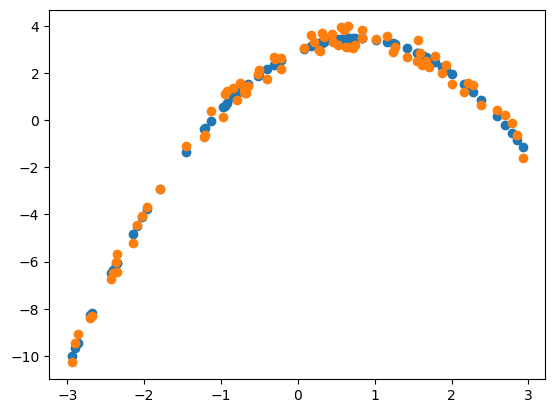

In [22]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train, y_train)

#### If we try for more degree, i.e. degree-3, what will happen and what is the accuracy?

In [23]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [24]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9874617743324996


#### From this result we can compare both accuracy. New result is 0.9874617743324996 and the previous result is 0.9876263663124372, The difference is little and previous one is the best fit.

In [25]:
# Prediction New data set
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

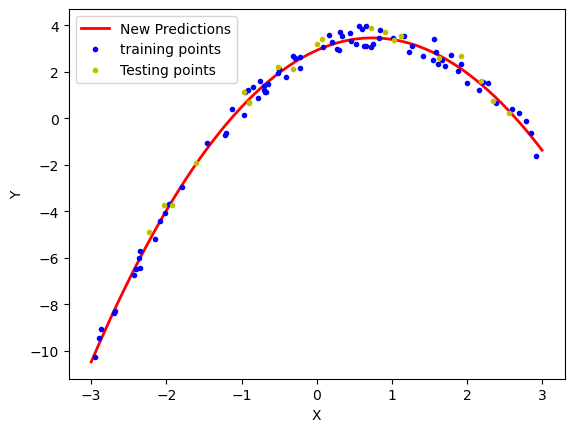

In [31]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new, y_new, 'r-', linewidth=2, label='New Predictions')
plt.plot(x_train, y_train, 'b.', label='training points')
plt.plot(x_test, y_test, 'y.', label='Testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()